In [62]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,scale
import sklearn.metrics as  sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.cluster import AgglomerativeClustering


In [63]:
data = pd.read_csv('Stars.csv')
y=pd.DataFrame(data.Type)
data.head(10)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [64]:
data['ClassId']=0
for index, row in data.iterrows():
    if row['Spectral_Class']=='A':
        data['ClassId'][index]=1
        
    if row['Spectral_Class']=='B':
        data['ClassId'][index]=2

    if row['Spectral_Class']=='F':
        data['ClassId'][index]=3
            
    if row['Spectral_Class']=='O':
        data['ClassId'][index]=4
            
    if row['Spectral_Class']=='K':
        data['ClassId'][index]=5

    if row['Spectral_Class']=='G':
        data['ClassId'][index]=6
            
    if row['Spectral_Class']=='M':
        data['ClassId'][index]=7
        

copy=data.copy()
copy.head(50)

<ipython-input-64-96ffcca37cc6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ClassId'][index]=7
<ipython-input-64-96ffcca37cc6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ClassId'][index]=2
<ipython-input-64-96ffcca37cc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ClassId'][index]=1
<ipython-input-64-96ffcca37cc6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Temperature,L,R,A_M,Color,Spectral_Class,Type,ClassId
0,3068,0.002400,0.17000,16.120,Red,M,0,7
1,3042,0.000500,0.15420,16.600,Red,M,0,7
2,2600,0.000300,0.10200,18.700,Red,M,0,7
3,2800,0.000200,0.16000,16.650,Red,M,0,7
4,1939,0.000138,0.10300,20.060,Red,M,0,7
5,2840,0.000650,0.11000,16.980,Red,M,0,7
6,2637,0.000730,0.12700,17.220,Red,M,0,7
7,2600,0.000400,0.09600,17.400,Red,M,0,7
8,2650,0.000690,0.11000,17.450,Red,M,0,7
9,2700,0.000180,0.13000,16.050,Red,M,0,7


In [65]:
colors=data['Color'].unique()
print(colors)

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


In [66]:
copy['isRed']=0
copy['isWhite']=0
copy['isblue']=0
copy['isYellow']=0
copy['isOrange']=0

for index, row in data.iterrows():
        
    if "red" in row['Color'].lower():
        copy['isRed'][index]=1

    if "whit" in row['Color'].lower():
        copy['isWhite'][index]=1

    if "blue" in row['Color'].lower():
        copy['isblue'][index]=1

    if "yellow" in row['Color'].lower():
        copy['isYellow'][index]=1

    if "orange" in row['Color'].lower():
        copy['isOrange'][index]=1
        


<ipython-input-66-fad8f5f12847>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['isRed'][index]=1
<ipython-input-66-fad8f5f12847>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['isRed'][index]=1
<ipython-input-66-fad8f5f12847>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['isWhite'][index]=1
<ipython-input-66-fad8f5f12847>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [67]:
copy.head(50)

,Temperature,L,R,A_M,Color,Spectral_Class,Type,ClassId,isRed,isWhite,isblue,isYellow,isOrange
0,3068,0.002400,0.17000,16.120,Red,M,0,7,1,0,0,0,0
1,3042,0.000500,0.15420,16.600,Red,M,0,7,1,0,0,0,0
2,2600,0.000300,0.10200,18.700,Red,M,0,7,1,0,0,0,0
3,2800,0.000200,0.16000,16.650,Red,M,0,7,1,0,0,0,0
4,1939,0.000138,0.10300,20.060,Red,M,0,7,1,0,0,0,0
5,2840,0.000650,0.11000,16.980,Red,M,0,7,1,0,0,0,0
6,2637,0.000730,0.12700,17.220,Red,M,0,7,1,0,0,0,0
7,2600,0.000400,0.09600,17.400,Red,M,0,7,1,0,0,0,0
8,2650,0.000690,0.11000,17.450,Red,M,0,7,1,0,0,0,0
9,2700,0.000180,0.13000,16.050,Red,M,0,7,1,0,0,0,0


In [68]:
copy=copy.drop('Color' ,axis=1)

In [69]:
s=data['Spectral_Class'].unique()
print(s)

['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [70]:
# copy['ClassId']=0
# for index, row in data.iterrows():
#     if row['Spectral_Class']=='A':
#         copy['ClassId']=1
        
#     if row['Spectral_Class']=='B':
#         copy['ClassId']=2

#     if row['Spectral_Class']=='F':
#         copy['ClassId']=3
            
#     if row['Spectral_Class']=='O':
#         copy['ClassId']=4
            
#     if row['Spectral_Class']=='K':
#         copy['ClassId']=5

#     if row['Spectral_Class']=='G':
#         copy['ClassId']=6
            
#     if row['Spectral_Class']=='M':
#         copy['ClassId']=7

In [71]:
copy=copy.drop('Spectral_Class' ,axis=1)
copy.head(50)

,Temperature,L,R,A_M,Type,ClassId,isRed,isWhite,isblue,isYellow,isOrange
0,3068,0.002400,0.17000,16.120,0,7,1,0,0,0,0
1,3042,0.000500,0.15420,16.600,0,7,1,0,0,0,0
2,2600,0.000300,0.10200,18.700,0,7,1,0,0,0,0
3,2800,0.000200,0.16000,16.650,0,7,1,0,0,0,0
4,1939,0.000138,0.10300,20.060,0,7,1,0,0,0,0
5,2840,0.000650,0.11000,16.980,0,7,1,0,0,0,0
6,2637,0.000730,0.12700,17.220,0,7,1,0,0,0,0
7,2600,0.000400,0.09600,17.400,0,7,1,0,0,0,0
8,2650,0.000690,0.11000,17.450,0,7,1,0,0,0,0
9,2700,0.000180,0.13000,16.050,0,7,1,0,0,0,0


In [72]:
y=copy.Type
x_scale=scale(copy.drop('Type',axis =1))
# x_scale=p.normalize(x_scale, norm="max")
x=(copy.drop('Type',axis =1))

kmeans = KMeans(n_clusters=6, random_state=3, init="k-means++").fit(x)
kmeans_scale = KMeans(n_clusters=6, random_state=3, init="k-means++").fit(x_scale)

In [73]:
data=data.drop('Spectral_Class' ,axis=1)
data=data.drop('Color' ,axis=1)
data.columns=['Temperature' ,'L','R','A_M','Type','ClassId']
y.columns=['type']

Text(0.5, 1.0, 'PREDICT')

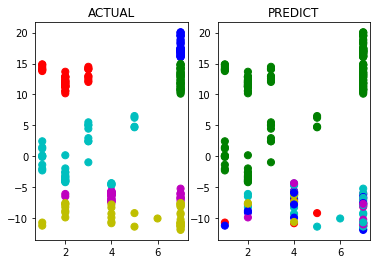

In [74]:
color_theme=np.array(['b' ,'g', 'r' , 'c' , 'm' , 'y'])

plt.subplot(1,2,1)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[data.Type], s=50)
plt.title('ACTUAL')

plt.subplot(1,2,2)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[kmeans.labels_], s=50)
plt.title('PREDICT')

Text(0.5, 1.0, 'PREDICT')

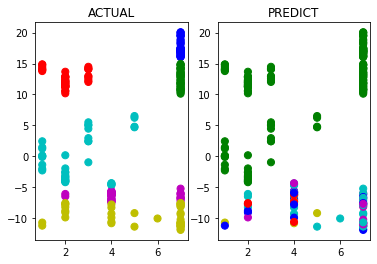

In [75]:
relabel=np.choose(kmeans.labels_ , [0,1,5,3,4,2])

plt.subplot(1,2,1)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[data.Type], s=50)
plt.title('ACTUAL')

plt.subplot(1,2,2)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[relabel], s=50)
plt.title('PREDICT')

In [76]:
most=[{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0}]
for index, row in copy.iterrows():
    if row['Type']==0:
        most[relabel[index]]['0']+=1
    if row['Type']==1:
        most[relabel[index]]['1']+=1
    if row['Type']==2:
        most[relabel[index]]['2']+=1
    if row['Type']==3:
        most[relabel[index]]['3']+=1
    if row['Type']==4:
        most[relabel[index]]['4']+=1
    if row['Type']==5:
        most[relabel[index]]['5']+=1
print(most)

[{'0': 0, '1': 0, '2': 0, '3': 0, '4': 10, '5': 8}, {'0': 40, '1': 40, '2': 40, '3': 34, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 3, '5': 3}, {'0': 0, '1': 0, '2': 0, '3': 5, '4': 18, '5': 14}, {'0': 0, '1': 0, '2': 0, '3': 1, '4': 7, '5': 11}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 2, '5': 4}]


In [77]:
print(sm.accuracy_score(data.Type , relabel))
#0 1 2 3 5 4
sum = 0
for index, row in copy.iterrows():
    if relabel[index]== 0 and row['Type']==4:
        sum+=1
    if relabel[index]== 1 and row['Type']==1:
        sum+=1
    if relabel[index]== 2 and row['Type']==2:
        sum+=1
    if relabel[index]== 3 and row['Type']==3:
        sum+=1
    if relabel[index]== 4 and row['Type']==5:
        sum+=1
    if relabel[index]== 5 and row['Type']==0:
        sum+=1

print("Accuracy =" ,sum/len(relabel))

0.23333333333333334
Accuracy = 0.275


Text(0.5, 1.0, 'PREDICT')

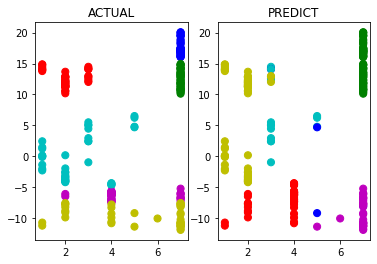

In [78]:
color_theme=np.array(['b' ,'g', 'r' , 'c' , 'm' , 'y'])

plt.subplot(1,2,1)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[data.Type], s=50)
plt.title('ACTUAL')

plt.subplot(1,2,2)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[kmeans_scale.labels_], s=50)
plt.title('PREDICT')

Text(0.5, 1.0, 'PREDICT')

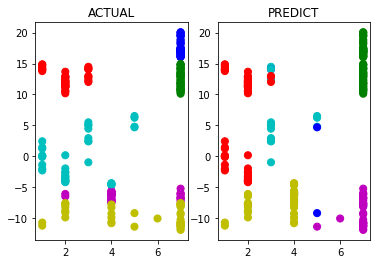

In [79]:
relabel=np.choose(kmeans_scale.labels_ , [0,1,5,3,4,2])

plt.subplot(1,2,1)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[data.Type], s=50)
plt.title('ACTUAL')

plt.subplot(1,2,2)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[relabel], s=50)
plt.title('PREDICT')

In [80]:
print(sm.accuracy_score(data.Type , relabel))

0.45416666666666666


In [81]:
most=[{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0}]
for index, row in copy.iterrows():
    if row['Type']==0:
        most[relabel[index]]['0']+=1
    if row['Type']==1:
        most[relabel[index]]['1']+=1
    if row['Type']==2:
        most[relabel[index]]['2']+=1
    if row['Type']==3:
        most[relabel[index]]['3']+=1
    if row['Type']==4:
        most[relabel[index]]['4']+=1
    if row['Type']==5:
        most[relabel[index]]['5']+=1
    

In [82]:
print(most)

[{'0': 0, '1': 0, '2': 1, '3': 1, '4': 0, '5': 2}, {'0': 40, '1': 40, '2': 0, '3': 0, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 35, '3': 23, '4': 0, '5': 1}, {'0': 0, '1': 0, '2': 4, '3': 11, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 9, '5': 23}, {'0': 0, '1': 0, '2': 0, '3': 5, '4': 31, '5': 14}]


In [83]:
#0 1 2 3 5 4
sum = 0
for index, row in copy.iterrows():
    if relabel[index]== 0 and row['Type']==0:
        sum+=1
    if relabel[index]== 1 and row['Type']==1:
        sum+=1
    if relabel[index]== 2 and row['Type']==2:
        sum+=1
    if relabel[index]== 3 and row['Type']==3:
        sum+=1
    if relabel[index]== 4 and row['Type']==5:
        sum+=1
    if relabel[index]== 5 and row['Type']==4:
        sum+=1

print("Accuracy =" ,sum/len(relabel))

Accuracy = 0.5833333333333334


In [84]:
H_cluster=AgglomerativeClustering(n_clusters=6, affinity='euclidean')
H_cluster.fit(x)

most=[{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0}]
for index, row in copy.iterrows():
    if row['Type']==0:
        most[H_cluster.labels_[index]]['0']+=1
    if row['Type']==1:
        most[H_cluster.labels_[index]]['1']+=1
    if row['Type']==2:
        most[H_cluster.labels_[index]]['2']+=1
    if row['Type']==3:
        most[H_cluster.labels_[index]]['3']+=1
    if row['Type']==4:
        most[H_cluster.labels_[index]]['4']+=1
    if row['Type']==5:
        most[H_cluster.labels_[index]]['5']+=1
print(most)


[{'0': 0, '1': 0, '2': 0, '3': 6, '4': 18, '5': 17}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 10, '5': 7}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 2, '5': 4}, {'0': 40, '1': 40, '2': 40, '3': 34, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 3, '5': 3}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 7, '5': 9}]


In [85]:
# 4 3 5 0 2 1
sum = 0
for index, row in copy.iterrows():
    if H_cluster.labels_[index]== 0 and row['Type']==4:
        sum+=1
    if H_cluster.labels_[index]== 1 and row['Type']==3:
        sum+=1
    if H_cluster.labels_[index]== 2 and row['Type']==5:
        sum+=1
    if H_cluster.labels_[index]== 3 and row['Type']==0:
        sum+=1
    if H_cluster.labels_[index]== 4 and row['Type']==2:
        sum+=1
    if H_cluster.labels_[index]== 5 and row['Type']==1:
        sum+=1

print("Accuracy =" ,sum/len(relabel))

Accuracy = 0.25833333333333336


In [86]:
sm.accuracy_score(y,H_cluster.labels_)

0.19166666666666668

In [87]:
H_cluster_scale=AgglomerativeClustering(n_clusters=6, affinity='euclidean')
H_cluster_scale.fit(x_scale)

sm.accuracy_score(y,H_cluster_scale.labels_)

most=[{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0},{'0':0,'1':0,'2':0,'3':0,'4':0,'5':0}]
for index, row in copy.iterrows():
    if row['Type']==0:
        most[H_cluster_scale.labels_[index]]['0']+=1
    if row['Type']==1:
        most[H_cluster_scale.labels_[index]]['1']+=1
    if row['Type']==2:
        most[H_cluster_scale.labels_[index]]['2']+=1
    if row['Type']==3:
        most[H_cluster_scale.labels_[index]]['3']+=1
    if row['Type']==4:
        most[H_cluster_scale.labels_[index]]['4']+=1
    if row['Type']==5:
        most[H_cluster_scale.labels_[index]]['5']+=1
print(most)


[{'0': 0, '1': 0, '2': 0, '3': 5, '4': 31, '5': 15}, {'0': 0, '1': 0, '2': 35, '3': 23, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 0, '3': 0, '4': 9, '5': 23}, {'0': 40, '1': 40, '2': 0, '3': 0, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 4, '3': 11, '4': 0, '5': 0}, {'0': 0, '1': 0, '2': 1, '3': 1, '4': 0, '5': 2}]


Text(0.5, 1.0, 'PREDICT')

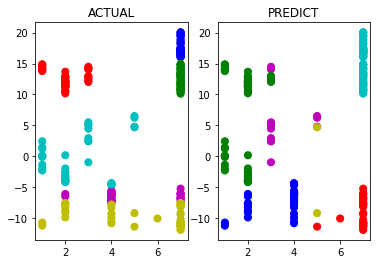

In [88]:
plt.subplot(1,2,1)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[data.Type], s=50)
plt.title('ACTUAL')

plt.subplot(1,2,2)
plt.scatter(x=data.ClassId , y = data.A_M , c=color_theme[H_cluster_scale.labels_], s=50)
plt.title('PREDICT')

In [90]:
# 4 3 5 0 2 1
sum = 0
for index, row in copy.iterrows():
    if H_cluster_scale.labels_[index]== 0 and row['Type']==4:
        sum+=1
    if H_cluster_scale.labels_[index]== 1 and row['Type']==3:
        sum+=1
    if H_cluster_scale.labels_[index]== 2 and row['Type']==5:
        sum+=1
    if H_cluster_scale.labels_[index]== 3 and row['Type']==0:
        sum+=1
    if H_cluster_scale.labels_[index]== 4 and row['Type']==2:
        sum+=1
    if H_cluster_scale.labels_[index]== 5 and row['Type']==1:
        sum+=1

print("Accuracy =" ,sum/len(relabel))

Accuracy = 0.5041666666666667


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\AliHekmat\miniconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\AliHekmat\miniconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\AliHekmat\miniconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\AliHekmat\miniconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection w